In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/boston_data.csv')

In [23]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243,16.8,393.97,9.43,20.5


In [4]:
df.shape

(404, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 44.3 KB


In [24]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


<AxesSubplot:>

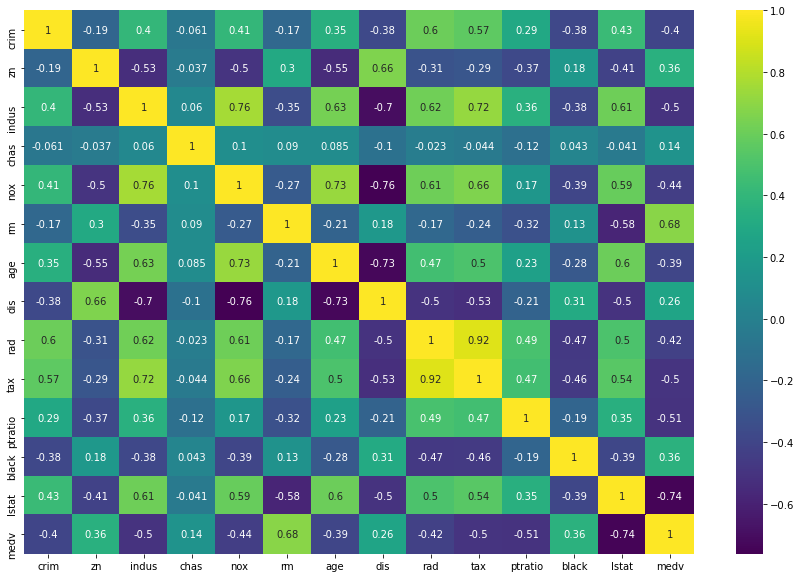

In [22]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap = 'viridis')

### Splitting the dataframe into training and testing data

In [10]:
#assigning independent variables to x and dependent variable or response variable to y
x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'lstat']]
y = df['medv']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [25]:
print("Dimension of x_train :",x_train.shape)
print("Dimension of x_test :",x_test.shape)
print("Dimension of y_train :",y_train.shape)
print("Dimension of y_test :",y_test.shape)

Dimension of x_train : (282, 13)
Dimension of x_test : (122, 13)
Dimension of y_train : (282,)
Dimension of y_test : (122,)


## Building a Linear Regression Model

In [12]:
lm = LinearRegression()
reg = lm.fit(x_train,y_train)

In [13]:
predictions = lm.predict(x_test)

In [14]:
predictions

array([20.91378468, 21.86576533, 23.72286085, 15.43379467, 22.50179969,
       18.12823755, 17.10769135, 25.62052683, 19.75938076, 26.24959121,
       16.51174583, 14.99090162, 28.47088781, 16.04536552,  7.58942277,
       18.75984464, 18.03090961, 23.55248909, 27.96337224, 32.47073528,
       36.93411706, 23.80771545, 21.06115435, 21.59470343, 28.46430294,
       21.331082  , 16.50699046, 12.2394018 , 26.01740713, 16.49366542,
       33.7509393 , 23.4741521 , 25.40520818, 14.36407566, 25.03689012,
       23.22570717,  6.88700416, 31.9978947 , 26.96038018, 13.62767967,
       27.73024658, 17.70414795, 20.82012421,  9.64675216, 32.48215302,
       26.5497374 , 15.61803454, 17.72587664, 29.41580429, 27.0848801 ,
       13.26602854, 19.24382327,  8.86144774, 31.17546825, 23.96354024,
       10.07192289, 19.73880545, 25.32485777, 28.04267791, 18.43856465,
       17.62281739, 34.22031643, 22.63785753, 20.88214578, 24.6371908 ,
       32.2884916 , 19.10075826, 15.62376286, 25.71608493, 18.63

In [15]:
y_test

297    21.7
110    19.0
2      20.3
312    14.1
263    25.0
       ... 
240    21.2
3      15.4
211    23.4
236    15.0
150    24.4
Name: medv, Length: 122, dtype: float64

Text(0, 0.5, 'Predicted Values')

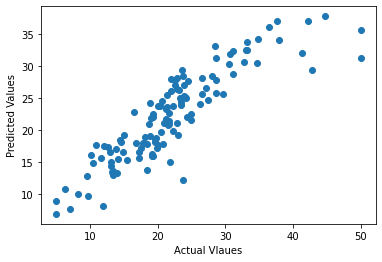

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Vlaues')
plt.ylabel('Predicted Values')

#### The scatter plot shows a high correlation between predicted and actual values

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.9398539889900737
MSE: 16.803042496936982
RMSE: 4.099151436204447


In [19]:
coefficients = pd.DataFrame(lm.coef_,x.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.087497
zn,0.042785
indus,-0.079213
chas,1.144681
nox,-15.059968
rm,3.559057
age,-0.004544
dis,-1.496255
rad,0.250453
tax,-0.011919


#### From the above table it can be inferred that chas, nox, rm, dis, ptratio, lstat highly affects the house price

In [20]:
yhat = reg.predict(x)

In [21]:
r2 = r2_score(y,yhat)
print("R-Squared =",r2)

R-Squared = 0.7483983231686366


#### R^2 value is 0.74 which means the model explains about 74% of the variation in our dependent variables